# Table of Contents

* [Introduction to Model/Approach](#chapter1)
    * [Goal of this tutorial](#section_1_1)
    * [A simple model of the labor market](#Section_1_2)
    
        
* [Data](#chapter2)
    * [Eurostat Data](#section_2_1)
    * [Data for this tutorial](#section_2_2)
    * [Data in Python: Pandas and Data Formats](#section_2_3)
        * [Setting up your pandas enviorment](#section_2_3_1)
        * [Reading data into a dataframe](#section_2_3_2)
        * [Creating a dataframe manually](#section_2_3_3)
         
    
* [Set_Up](#chapter3)
    * [Import all packages](#section_3_1)
    * [Define the Folder](#section_3_2)
    
    
* [Unemployment Rates](#chapter4)
    * [Matplotlib](#section_4_1)
    * [Import the measured Unemployment Rates](#section_4_2)
    
    
* [Transition Rates](#chapter5)
    * [The exec() function](#section_5_1)
    * [Load all the excel files containing the aboslute data about persons moving between states](#section_5_2)
    * [Compute transition rates](#section_5_3)
    * [Export all the created DataFrames to .xlsx files](#section_5_4)
    
    
* [Steady State Unemployment Rates](#chapter6)
    * [Introduction to the Economic Side of Steady State Unemployment Rates](#section_6_1)
    * [Compute Steady State Unemployment Rate for each country and period](#section_6_2)
    * [Plot time series of measured Unemployment Rate and Steady State Unemployment Rate](#section_6_3)
    * [New DataFrame with country averages](#section_6_4)
    * [Add country codes to the DataFrame](#section_6_5)
    * [Export DataFrame to a file](#section_6_6)
    * [Define the Folder](#section_6_7)
        * [Pickle](#section_6_7_1)
        * [pandas.DataFrame.to_excel](#section_6_7_2)
        
        
* [Model Performance](#chapter7)       
    
        
    
    
    
    
        
        

# Introduction to Model/Approach <a class="anchor" id="chapter1"></a>

## Goal of this tutorial <a class="anchor" id="section_1_1"></a>

The goal of this tutorial is to present the features of the European labor market in Python consistently and with commentary. From a programming side, the main objective was working with data. From an economic side, the main objective was implementing an economic model and using programming to demonstrate features otherwise more difficult to demonstrate.

This tutorial will focus mainly on the learnings from a programming perspective. However, this introduction will set up the background from an economic side to orientate the reader. There will be additional economic commentary throughout the sections.

## A simple model of the labor market <a class="anchor" id="section_1_2"></a>

A simple model of the labor market that is used in this tutorial catagorizes three states a working-age person can be in:
1. Employed E
2. Unemployed U
3. Inactive or out of the labor force N

Using three states you can analysze labor market indicators:

* __Participation Rate__:  $$ \frac{E + U}{E + U + N}\label{eq1}\tag{1} $$

* **Employment Rate**: $$ \frac{E}{E + U + N}\label{eq2}\tag{2} $$

* **Unemployment Rate**: $$ \frac{U}{E + U}\label{eq3}\tag{3} $$

The flows of people from one state to another are called **transitions**. Transition rates are calculated from using data that shows the beginning and end value of people in states, and then is calculated from the change.

For example, UE transition rates represent the percentage of people unemployed at the beginning of the period that transition to being employed.

It can be used to approximate how likely it is for an unemployed person to find a job (Job finding probablity).

This will be elaborated upon further in the tutorial as it specific to certain sections.

# Data <a class="anchor" id="chapter2"></a>

## Eurostat Data <a class="anchor" id="section_2_1"></a>

In order to compare the different dynamics of countries related to transition rates and unemployment rates, data needs to be collected systematically and in a reliable manner. All data used in this tutorial is extracted from Eurostat which is an adminitrative branch of the European Commission located in Luxembourg. Its responsability is to provide statistical information to the institutions of the European Union and to encourage the harmonisation of statistical methods in order to ease comparison between data. In this section, we will discuss how Eurostat gather data and the degree of relability of its operations. Eurostat publishes its statistical database online for free on its [website](https://ec.europa.eu/eurostat).

The data that will interest us in this tutorial are the one related to the **European Labor market**. The European Labor Force Survey is a survey conducted by Eurostat in order to find those data. The latter are obtained by interviewing a large sample of individuals directly. This data collection takes place over on a monthly, quarterly and annually basis. The European Labor Force Survey collects data by 4 manners:

- Personal visits
- Telephone interviews
- Web interviews
- Self-administered questionnaires (questionnaire that has been designed specifically to be completed by a respondent without intervention of the researchers)

The overall accuracy of these methods have been proved to be high. Retrospectively, the results have been found to lay in a 95% confidence interval. For more information related to how Eurostat collects its data, you can consult this [page](https://ec.europa.eu/eurostat/cros/content/data-collection_en).


## Data for this tutorial <a class="anchor" id="section_2_2"></a>

In Eurostat, you are able to download a .tsv file. Tsv files are similar to csv but use tabs to separate data instead of commas like in csv files. Or, you can use the Pyrostat API for python. However, the documentation at the moment of creating this tutorial is not clear enough to present in a clear way. It is based upon a json and unicode REST api from the eurostat page, but is beyond the scope of this tutorial. For more information see [eurostat web services](https://ec.europa.eu/eurostat/web/json-and-unicode-web-services) and [pyrostat](https://github.com/eurostat/pyrostat).

The data used for this tutorial comes from the Eurostat website. In particular, the data set (sdg_08_30) with information [here](https://ec.europa.eu/eurostat/cache/metadata/en/sdg_08_30_esmsip2.htm).

Therefore, the rest of the tutorial will focus on data import, cleaning and analysis starting with the provided Excel files from this class.

## Data in Python: Pandas and Data Formats <a class="anchor" id="section_2_3"></a>

This section will give a basic introduction into how data works in python and programming. Data in general can be stored in several different formats that organize it. The basic formats have been introduced in past tutorials (lists, dictionaries, tuples). More advanced ones are:
1. Unstructured data files of .txt.
2. Or structured data files:
    * CSV files such as excel that separate data cells with a comma and creates tables.
    * TSV files that separate data cells with tabs.

They can be imported into python and stored in a data frame using the python extension pandas. The advantage of data frames is the wide variety of operations you can perform on them in python since it is a python object ([source](https://towardsdatascience.com/a-quick-introduction-to-the-pandas-python-library-f1b678f34673)).

As a pandas dataframe is structed by rows and column, it is easier to select data compared to a list or a dictionary. You can also easily filter by column or row in order to derive conclusions or structure the data set for analysis. You can also join different pandas datasets as well as clean data easier than if you were working with another data type. These examples are elaborated upon below.

### Setting up your pandas enviorment <a class="anchor" id="section_2_3_1"></a>

It is often easy to import pandas as pd such so it easier to call it later on.

`import pandas as pd`

Additonally, it is common to also import it with the package *numpy*

`import numpy as np`

Numpy is used for analysis and computing in python.

### Reading data into a dataframe <a class="anchor" id="section_2_3_2"></a>

In order to convert structured files into a pandas data frame there are a variety of options that you can find here: [List of pandas functionalities](https://pandas.pydata.org/pandas-docs/stable/reference/index.html). Some examples are the ability to convert excel, json, html, csv, pickle, and sql. These are generally formatted as:

`read_excel
read_pickle
read_json
read_html
etc.
`



### Creating a dataframe manually <a class="anchor" id="section_2_3_3"></a>

There is also the option with pandas to create a dataframe either manually or by using existing lists or dictionaries.

For example, dataframes can be created from dictionaries.

In [30]:
import pandas as pd
#here, creating a food dictionary setting categories
food_categories={"apples":"fruit",
                  "oranges":"fruit",
                  "cucumber":"vegetable",
                  "spinach":"vegetable",
                  "beef":"meat",
                  "pepper":"vegetable",
                  "banana":"fruit"
                    }
#created dataframe setting category as the index
food_cat_df=pd.DataFrame(food_categories, index=["category"])  
food_cat_df


,apples,oranges,cucumber,spinach,beef,pepper,banana
category,fruit,fruit,vegetable,vegetable,meat,vegetable,fruit


Some other useful functions for dataframe in pandas will be used below, but are:

* Transposing, or transforming columns into rows: df.T
* Sorting by axis or values: df.sort_index(axis=1) or df.sort_values(by='category')
* Selecting a single column: df['Fruit']
* Statistic operations such as df.mean()
* Merging and appending: pd.merge(), df.append(, pd.concat()

The pandas documentation provides a very good description of what you can do with dataframes and if there is something that interests you beyond the application of this tutorial, it may very likely be found at [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html).

# Set-Up

## Import all packages

Here, we will import all the packages that are used in the program. As packages have not been introduced in past tutorials, we will explain them in Python briefly.

First, if running a Python program on your local hardrive for example in spydir, it will be necessary to install a package on your computer or a virtual enviorment (venv or virtualenv). Virtual enviorments allow you to separate packages and versions for individual projects. For more information see [section for creating virtual enviorments](https://packaging.python.org/tutorials/installing-packages/). Otherwise, Python will not be able to understand to what you are refering as it will not be defined. It is suggested you use the functionality [pip](https://pip.pypa.io/en/stable/user_guide/) which allows you to install from the [python packaging index](https://packaging.python.org/tutorials/installing-packages/).

Once a packages has been installed, you may then import the function into a piece of code.

However, for the purpose of this tutorial, jupyter does not require you to pip install the following packages. For convience and clarity, they will be imported in this section, but we will reference the specific libraries as a note throughout the tutorial.

In [31]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
from pandas import ExcelWriter
from pandas import ExcelFile
import math
import statsmodels as sm

## Define the Folder

Our data is in three different local folders:

* `Total/` for all the working-age population.
* `Female/` for only the working-age females.
- `Male/` for only the working-age males.

In this case it makes sense to specify which folder to use in advance. If we want to change from `Total/` to `Female/` later on, we can easily change the variable sex instead of having to search for the name of the folder in the whole code. The same holds true for the variable *myfolder*, if the location of the data changes later on, we can apply that change right here instead of searching for all the times we used that filepath.

In general, the easiest way to find locally saved files with python on a mac is to use a relative filepath. This means Python starts searching for the file from the location of the Python code we are currently working with. Here, the folder *EuropesLM_Data/* is located within the same folder as the notebook. From there, Python proceeds by entering the *Male/* folder and then accesses whatever we specify later on. To execute everything the way we do in this tutorial, you should place the jupyter notebook in the same folder as the file *country_codes.xlsx* and the folder *EuropesLM_Data*.

If on Windows, the easiest way is to use a full filepath, starting at the `C:/` directory and specifiing all steps to go from there.

In [32]:
sex = 'Male'
myfolder = "sample_data/" + sex + "/"

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Unemployment Rates

Almost all countries in the world have developed a system and the infrastructure to record and approximate the unemployment rate of the labor force as accurately as possible. In order to understand its significance we shall agree on a clear definition in more detail than what was provided earlier. There are numerous definitions since the methodology for calculating the unemployment rate often varies among countries. Different definitions of employment and unemployment, as well as different data sources are used but the consensus is the following: unemployed people are those who are willing and available to work, and who have actively sought work within the past four weeks. Students, prisoners, or for example handicapped people do not match the definition and are not considered as unemployed but out of the labor force.

To calculate the unemployment rate, the number of unemployed people is divided by the number of people in the labor force, which consists of all employed and unemployed people.

***

$\mathbf{\text{Unemployment rate}}$<br>
***
$$\textrm{Unemployment rate} = \frac{\textrm{Number of unenployed people}}{\textrm{Total Labour Force}}$$

***

Before we plot the unemployment rate for different countries, we want to give a little introduction to plotting in general.

## Matplotlib

The most common library for plotting in python is [`Matplotlib`](https://matplotlib.org/stable/index.html). We are going to introduce its most important functionalities with some basic examples in the following section. In the following parts, we will further specify the functionalities when we use them.

```python
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

```

To show the basic functionality of Matplotlib, here we create a sample plot

* The List items in the argument of `plt.plot` contain the x and y coordinates, to refer to it later, we can add the argument label
* If we want to see the plot in the Jupyter Notebook, we have to call the `plt.show` function

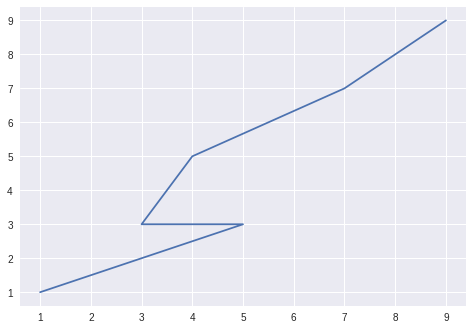

In [34]:
plt.plot([1, 5, 3, 4, 7, 9],[1, 3, 3, 5, 7, 9], label = "Random Graph")
plt.show()


* Using `plt.ylabel`, we can give names to the axes
* To make our plot look a little better, we use `plt.style.use()`. There's a variety of styles available [here](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)
* The plot's title can be set with `plt.title()`
* To see our labels in the plot, we simply call `plt.legend`, the location can be specified using the loc argument
* If we want to show multiple graphs in one plot, we simply call `plt.plot()` again before calling `plt.show`.

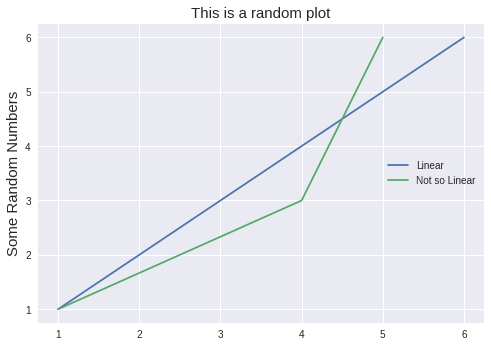

In [35]:
plt.plot([1, 3, 6],[1, 3, 6], label = "Linear")
plt.plot([1, 4, 5],[1, 3, 6], label = "Not so Linear")

plt.ylabel("Some Random Numbers", fontsize = 15)
plt.style.use("seaborn")
plt.title("This is a random plot", fontsize = 15)
plt.legend(loc = "center right", fontsize = 10)
plt.show()

After this short introduction, we wanet to start by importing and plotting the measured unemployment rates.

## Import the measured Unemployment Rates

The easiest way to handle our data is a [`pandas.DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). Fortunately, Pandas as a useful function to read Excel files and create DataFrames out of them: [`pandas.read_excel`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html).

However, depending on the shape of the data, there can be difficulties when handling Excel files with pandas. In our case that includes:

1. Rows at the beginning of the spreadsheet that don't contain the data we're looking for and that we'd therefore like to skip when reading the Excel into a DataFrame.

2. The shape of the Excel file is not in the way that would be conventional for [pandas](https://pandas.pydata.org/pandas-docs/stable/). The index (the time period) is usually in the rows instead of the columns.

3. Eurostat records missing data with ":" and a separate sheet for flags, while NaN is the proper way to record missing observations. This means we'll have to set all the missing observations to *NaN*.

4. Some Country names, for example "Germany (until 1990 former territory of the FRG)" are in a format that makes it hard to use them in loops and other functionalities of python.

5. To work efficiently with `pandas` classes, it is important to use the right [indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html). In this case we are dealing with (a set of) [time series](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html), so we want the index to have the proper functionality. In particular, our data refers to a full calendar year quarter which can be represented using a [period](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html). This sort of information cannot be read from the Excel file as the reference to the quarters there is just a string.

At the beginning, let's load the first sheet containing the actual data into a `pandas.DataFrame`. In this case, the `pd.read_excel` function gets five inputs:

1. *aux_name*, the name and location of the file. We store it in a variable right away, that way the code is more readable and we can easily change it later

2. *skiprows*, the information to skip the first 11 rows, these are the rows that don't contain necessary information

3. *index_col*, which column to use as the DataFrame's index

4. *sheet_name*, which of the Excel's sheets to use, the default would be 0, the first sheet

```python
# We store the filename in a variable, that makes it easier to change it later
aux_name = myfolder + "lfsq_urgan.xls"
# Next, read the first Excel sheet
aux_data = pd.read_excel(aux_name, skiprows=11, index_col=0, sheet_name='Data')
aux_data
```

After creating the `Pandas.DataFrame` , we want to start cleaning the data. As mentioned, there are two ways in which Eurostat records missing data. The first is by setting the otherwise empty cells to ":". We can change those to NaN easily by using [`pandas.DataFrame.replace`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) and giving the function the inputs:

* ":" - what should be replaced

* "np.NaN" - the NaN functionality of Numpy that should be replaced with

It will continue to find all ":" in *aux_data* and replace them with NaN. Note that those are not just different strings but a method of numpy.

```python
aux_data = aux_data.replace(':', np.NaN)
```

After the first sheet, we now want to create a second `Pandas.DataFrame` for the *flags* sheet of our excel file. The second sheet has the same format and contains flags for bad data. We will use it to set all those cells in *aux_data* to `np.nan`.

Besides the inputs we used when reading the first sheet, here the function also gets the input:

* *nrows = aux_data.shape[0]*, nrows tells `read_excel` how many rows to parse and [`pandas.DataFrame.shape`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html) passes the number of rows of our DataFrame *aux_data* as an integer.

```python
aux_flags = pd.read_excel(aux_name, skiprows=11, index_col=0, nrows=aux_data.shape[0], sheet_name='Flags and Footnotes')
```

To prepare the DataFrames for later indexing, we have to transpose them. This is possible with the `DataFrame.T` function. What it does is basically to exchange columns and rows of the DataFrame.

```python
aux_data = aux_data.T
aux_flags = aux_flags.T
```

To find the cells in *aux_data* that correspond to flags in *aux_flags* and set them to NaN, we will use a function. This function will later:

1. Iterate over the cells of our DataFrame

2. Compare each cell of the *flags* sheet with the corresponding one in the *data* sheet

3. Set the cell to *NaN* if the *flags* sheet contains a string.


The iteration process works as follows:

* We pass our DataFrames using [pandas.DataFrame.values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html). It converts the DataFrames into a Numpy Array object which can be handled by the enumerate function.

* Enumerate is extremely useful, it lets us iterate over someting (like a list) and automatically assign a counter to it


In our case that will be the row and column number (integers) of the values in the passed DataFrame.values. That also explains why we convert the DataFrames into Numpy arrays - we can't adress a cell in a DataFrame by calling `DataFrame[row_number, column_number]` but we can do the same with a Numpy array.

```python
# Our function get's two inputs, both of which will be sheets of an Excel file
def flags_to_NaN(data,flags):
    # Iterate over the array, return rows with their number
    for row, l in enumerate(flags):
        # Iterate over the row from the last line, return a single value with its column number
        for column, value in enumerate(l):
            # Check for strings
            if type(value) is str:
                data[row,column] = np.nan
    return data
```

Now we apply our function to the DataFrames we created in the previous steps. In detail, it does this:

1. `for row, l in enumerate(flags)`: This returns *row*, the row number and l, what the row contains (Something similar to: ['b' nan nan nan nan])

2. `for column, value in enumerate(l)`: This returns *column*, the location of the value in *l* ('b' would be 0) and value, the value itself ('b')

3. Then it checks if the value it has found is a string (The missing values are recorded with flags like 'b' or 'u'). If it is, it searches the exact same location in the array with the data (they have the same format so the rows and columns correspond) and sets it to np.nan

We save the cleaned DataFrame as *mydata*.

```python
aux_values = flags_to_NaN(aux_data.values, aux_flags.values)
mydata = pd.DataFrame(aux_values)
```

To make working with the final DataFrame easier, we'll now simplify the names of *Germany* and *Macedonia*. The ?`DataFrame.rename` method takes input in form of a dictionary containing:

1. The old column name as *Key*

2. The new column name it should be changed to as *Value*

```python
aux_data = aux_data.rename(columns = {'Former Yugoslav Republic of Macedonia, the':'Macedonia'})
aux_data = aux_data.rename(columns = {'Germany (until 1990 former territory of the FRG)':'Germany'})
```

Now, let's create a [`pd.period_range`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.period_range.html) called "dates" which we will use as an index for our final DataFrame. This practical function gets three important inputs:

1. Start and end of the `pd.period_range`.
2. The frequency "Q". This way it knows only to create new datapoints quarterly, instead of monthly or weekly.
3. The name 'Quarterly Frequence'.
4. It returns a Period Index with a fixed frequency that we can use as index for our DataFrame.

```python
import pandas as pd
# Create the pd.period_range
dates = pd.period_range(start='2010Q2', end='2017Q4', freq='Q', name='Quarterly Frequence')
# Set mydata's index to be the Period "dates" we just created
mydata.index = dates
```

At last, some minor changes before we finish our DataFrame mydata:

1. Correct the column names. We can simply re-use the names of the colums of aux_data.
2. Drop the *Germany* column, the data in there is damaged and would cause trouble later.
3. Give the column-row a fitting name.

```python
# To set the names of the countries as column names, 
mydata.columns = aux_data.columns

# Drop Germany
mydata = mydata.drop(['Germany'], axis=1)

# Update the name of the columns list
mydata.columns.name = 'Countries'
```

1. Seasonally adjust the data.

To prevent the data being influenced by strong seasonal deviations, we will use a "moving average". We calculate it by using:

1. [`pandas.DataFrame.rolling`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html), which works by always looking at 4 rows of the DataFrame. In our case, that equates to one year.

2. [`pandas.DataFrame.mean`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html), which calculates the mean or average of what we pass it.

In combination, those two calculate the moving average.

```python
# Seasonally adjust data
mydata = mydata.rolling(4).mean()
mydata
```

Now we want to plot the Unemployment Rates of different countries against each other to see how they compare. We use some more functionalities of `Matplotlib` here.

* `figsize(width, height)`, this defines the size of the figure in inches.
* Set the limits of the axes. This simply makes the plot look more tidy because there's no excess space at the ends of the axes we don't need.

```python
# Modifies the defult size of plots [13.0,6.0] inches
matplotlib.rcParams['figure.figsize'] = [13.0,6.0]
#mydata['Germany'].plot(legend=True)
mydata['Sweden'].plot(legend=True) # Legend = True display the name of the country on the graph. 
mydata['Finland'].plot(legend=True)
mydata['Switzerland'].plot(legend=True)
mydata['Macedonia'].plot(legend=True)


plt.ylim(0,35)  # the y axis ranges from 0 to 35
plt.xlim("2011Q1","2017Q4")
plt.ylabel('Unemployment Rate (%)', size = 14) # Name x axis
plt.xlabel('Quaterly Frenquency', size = 14) # Name y axis
plt.title('Unemployment rate in Percent for different countries', weight = 'bold', size = 20)
plt.show()
```

# Transition Rates of the Labor Market

Another type of data useful to provide us with insight concerning the European Labor Market is the transitions rates. They tell us how fast or how likely an individual move from a category to another. There are 9 different transitions formed by the 3 states a person can be in : 'U' for unemployed, 'E' for employed, and 'N' for out of the labor force. Therefore we can explicit all the different transitions from a period to another (t to t+1) by a matrix 3x3:

|*Today/tomorrrow*|E|U|N|
|:-----:|:--:|:--:|:--:|
|**E**|EE|EU|EN|
|**U**|UE|UU|UN|
|**N**|NE|NU|NN|

We can then analyse different indicators such as the EU + EN -> Job Destruction rate & UE + NE -> Job finding rate.

Nevertheless, it is important to mention that we calculate transition rates and not exactly the probability to move from 1 state to another because of the following reasons. The way data is collected tells us how many people move across states **for a given period** and with those data we can compute the transitions rates. For example the UE transition rate (let's call the variable *rate_UE*) tells us the proportion of unemployed people that went from unemployment to employment during a given period. To calculate it, we divide the number of people that transitioned from the initial state to the target state by the number of people in the initial state and. This yields our variable *rate_UE*.

Many transitions can happen at any time between the person is surveyed the 1st time and the second. The current data only measure the transition from point a to point b but not what happens in between. Since Eurostat does not register data in continuous but in a discret manner and changes happen in continuous, the transition rates are only an approximative of the probability to move from 1 state to another. Plus, since those rates should approximate probabilities, they can not be negative or greater than 1.

## The `exec()` function
Before we continue, we will briefly introduce the [`exec()`](https://docs.python.org/3/library/functions.html#exec) function.

The exec() function was designed to run a python programme submitted as parameter. The code execution happens dynamically and is applicable to strings or object codes. In our case that makes it very useful for saving files or DataFrames with different names.

The two important parts are:
1. The `{}` brackets: They specify at which part of the string something from the `.format()` section should be put in.
2. The `.format()` section: It specifies what should be put into the `{}` when the exec function is called.

In our case, in each iteration the first `{}` takes the key of the dictionary and the second `{}` takes the corresponding value.

In [38]:
example_dictionary = {"Apple" : "2€", "Cherry": "10€", "Peach": "6€", "Banana": "4€"}

# Using the exec-function, we can easily print out a "Pricelist" made up from the keys and values of a dictionary
for key in example_dictionary:
    exec("print('One kilogram of {} costs {}')".format(key, example_dictionary[key]))


One kilogram of Apple costs 2€
One kilogram of Cherry costs 10€
One kilogram of Peach costs 6€
One kilogram of Banana costs 4€


## Load all the excel files containing the absolute data about persons moving between states

In [39]:
states = ['E', 'U', 'N']
transitions = [] # We set an empty list that will be filled with the 9 transitions

for today in states:

    for tomorrow in states:

        # Create a frame name
        frame_name = today + tomorrow
        transitions.append(frame_name)
        file_name = 'lfsi_long_q_' + frame_name + '.xls'

        # Load xls with data and flags
        aux_name = myfolder + file_name
        aux_data = pd.read_excel(aux_name, skiprows=11, index_col=0, sheet_name='Data')
        aux_data = aux_data.replace(':', np.NaN)
        aux_flags = pd.read_excel(aux_name, skiprows=11, index_col=0, nrows=aux_data.shape[0],
                                  sheet_name='Flags and Footnotes')

        # Transpose data and flags
        aux_data = aux_data.T
        aux_flags = aux_flags.T

        # Change the name of Macedonia
        aux_data = aux_data.rename(columns = {'Former Yugoslav Republic of Macedonia, the':'Macedonia'})

        # Update the name of the columns list
        aux_data.columns.name = 'Countries'

        # Convert data flags into NaNs
        aux_values = flags_to_NaN(aux_data.values, aux_flags.values)
        mydata_transitions = pd.DataFrame(aux_values)

        # Set proper period index
        mydata_transitions.index = dates

        # Set proper column names
        mydata_transitions.columns = aux_data.columns

        # Set an appropiate name to the DataFrame
        mydata_transitions.name = frame_name + ' Transitions'

        # Save DataFrame with proper name
        exec('{} = mydata_transitions'.format(frame_name))

FileNotFoundError: ignored

## Compute transition rates
To compute the transitions rate we need to iterate over all the possible combinations of `['E','U','N']` and check that all the computed rates are in the [0,1] interval. In order to do the later, we can define a function that uses `DataFrame.min()` and `DataFrame.max()`. The function warns us if a value in the rows or column of the Dataframe is smaller than 0 or bigger than 1 since they represent probabilities. . max().max() will look at the maximum of the rows and maximum of the columns and similarily for min().min(). We don't have to check every single value because if the maximum and minimum values fulfill this criterium, the rest of the values will be okay, if not, we have to check the whole code anyway.

In [ ]:
# 1. Maybe we can implement here exception handling?
# Reason: Error handling allows to decide if we want our code to be interrupted
# 2. We can indicate the user where there is an error e.g. "Value bigger/smaller than one/zero in cell ..."

def check_rates(data):
    if data.max().max() > 1: # If the max value of the data >1
        print("ATENTION: In " + data.name + "at least one value bigger than 1")
    if data.min().min() < 0: # If the mmin ax value of the data <0
        print("ATENTION: In " + data.name + "at least one value smaller than 0")

The excel file names containing the data regarding the transition rates have very similar names except that they differ at the end. They end by the respective transition rate ("EE" or "UE"). The list created above containing the 9 transitions helps us to find fast way to go through all the excel files.

In [ ]:
transition_rates = []

for today in states:
    # Define E, U, and N stocks in the current period
        exec(today + ' = ' + today+'E + ' + today+'U + ' + today+'N')

        for tomorrow in states:
            frame_name = 'rate_'+today+tomorrow
            transition_rates.append(frame_name)

            # Create an auxiliary data set with all the transition rates (easier to use .name)
            # E.g UE/E: number of people that go from unemployment to employment/number of people employed
            exec('aux_data = {}{}/{}'.format(today,tomorrow,today))
            # Set an appropiate name to the DataFrame
            aux_name = '{}{} Transitions rates'.format(today,tomorrow)
            aux_data.name = aux_name

            # Check values
            check_rates(aux_data)

            # Save DataFrame with proper name
            exec(frame_name + ' = aux_data')

To see the results, we will plot some of our computed rates using `Matplotlib`. Its important to include the `sex` variable along with the data displayed in the title so there are no misunderstandings.

In [ ]:
#import matplotlib.pyplot as plt

rate_UE.mean().sort_values(ascending=False).plot.bar(color='b', figsize=(14,7))

plt.title("Average UE Rates ({}), 2010Q2-2017Q4".format(sex))
plt.xlabel('Countries')
plt.show()

If we want to make our plot look a little fancier we can again use the broad functionality of `Matplotlib`
- To have some variety, we use a different style than before *fivethirtyeight*.
- We specify the plot to be a barplot and then decide on the labels for the individual bars.

In [ ]:
#import matplotlib

matplotlib.style.use('fivethirtyeight') # to see all style available do: print(plt.style.available)
# Display the mean of each country's unemployment rate between Q2 2010 and Q4 2017
# sort_values(ascending = False) the values are displayed from the highest to the lowest
ax = rate_UE.mean().sort_values(ascending=False).plot(kind='bar', figsize=(14,7), fontsize = 14, width=0.75)
plt.title("Average UE Rates ({}), 2010Q2-2017Q4".format(sex), fontsize=25)
plt.xlabel('') # set x label as an empty string for stylistic reason

# set individual bar lables
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), # 2 is number of decimals after the comma displayed.
                (p.get_x()+p.get_width()/2., p.get_height()-0.025), # set the location where to display the average UE rate
                ha='center', va='center', xytext=(0, 10), # center the text.
                textcoords='offset points',
                rotation=90) # rotate the number by 90°

plt.show()

## Export all the created DataFrames to `.xlsx` files
`pandas` offers built-in functionality to simplify this task. See:
- [`pandas.DataFrame.to_excel`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_excel.html).
- [Working with Python Pandas and XlsxWriter](https://xlsxwriter.readthedocs.io/working_with_pandas.html).

This will create an Excel file that contains the same columns and rows our DataFrame does. The obvious advantage of this method is that the file can  be read using Excel, while maintaining the option of importing it again in other notebooks. Pandas has a built-in functionality for this, called DataFrame.to_Excel. It works as follows:
1. We loop over all possible transitions.
2. We specify the name of the future Excel file.
3. We specify what it should be created out of,
4. We define the ExcelWriter.
5. We convert the DataFrame to an Excel file and save it locally in the folder we specified above.

In [ ]:
for rate in transition_rates:
    # Define file name
    file_name = '{}{}.xlsx'.format(myfolder,rate)

    # Store DataFrame in aux_data
    exec('aux_data = {}'.format(rate))

    # Define Excel Writer
    writer = pd.ExcelWriter(file_name)

    # Convert DataFrame to Excel object.
    aux_data.to_excel(writer, sheet_name='Data')
    exec("{}.to_excel(writer, sheet_name='Data')".format(rate))

    # Close the Pandas Excel writer and output the Excel file
    writer.save()

# Steady State Unemployment Rates

## Introduction to the Economic Side of Steady State Unemployment Rates

The Steady-State unemployment rate is given by

$$\frac{s}{s+f}$$

- $s$ represents the fraction of employed workers loosing their jobs and 
- $f$ represents the fraction of unemployed workers that find new jobs. 

A *steady state* in economics is the levels of independent variables in a model such that from one period to another, the dependent variable stays constant.

Here, this means that the steady state unemployment rate, which is determined by s and f are at a level such that that the unemployment rate stays constant from period $t$ to period $t+1$.
   
Steady states have a large impact when studying growth theory and other economic models. If you assume that an economy and world converges on a steady state given certain factors, then it becomes interesting to evaluate how the current levels are in comparison to the steady state.

This therefore calculated from setting the point where the same number of people lose and find a job in a period:
$$sE=fU$$

And solving for $$\frac{U}{L}$$ the steady state unemployment rate

In our case, these rates are represented by the transition rates. 

$s = {\pi^{EN}\pi^{NU}+\pi^{NE}\pi^{EU}+\pi^{NU}\pi^{EU}}$

$f = {\pi^{UN}\pi^{NE}+\pi^{NU}\pi^{UE}+\pi^{NE}\pi^{UE}}$

That means we can calculate $UR_{SS}$ as follows:

$$UR_{SS} = \frac{\pi^{EN}\pi^{NU}+\pi^{NE}\pi^{EU}+\pi^{NU}\pi^{EU}}{(\pi^{UN}\pi^{NE}+\pi^{NU}\pi^{UE}+\pi^{NE}\pi^{UE})+(\pi^{EN}\pi^{NU}+\pi^{NE}\pi^{EU}+\pi^{NU}\pi^{EU})}$$

We can use a temporary data set, where we copy the DataFrame of the country we are dealing with, to simplify the code.

To find out what the Steady State Unemployment Rate of a given Country is, visualize it and compare it to the  measured unemployment rate, we will: 

1. Import the measured unemployment rate from excel using pandas.
2. Compute the Steady-State unemployment rate using the Transition rates from the previous section.
3. Compare the measured unemployment rates with our model of Steady-State unemployment rates using different plots and statistical methods.

We start off with the DataFrame *mydata_measured_unemployment* we created out of the cleaned unemployment data before. To continue computing the Steady State Unemployment Rates, we will use this DataFrame to create separate DataFrames for each of our countries.

We do that by iterating over the countries in the column list of *mydata* and, at each iteration:
- Create a new DataFrame for the column/country.
- Set the the name of the column which contains the country's name to *measured unemployment rate* for the country to the country's name.
- Change the countries' names that contain spaces.
- Add the country to a list for future iterations.
- Save *temp_data* as a new DataFrame with the name of the country.


In [ ]:
# This creates an empty list were we can store all the country names for future use
countries = [] 

# Now we iterate over all the column names (the countries)
for country in mydata.axes[1]:
    
    # Now we chose the relevant column in aux_data
    temp_data = pd.DataFrame(data = mydata[country])
    
    # We rename the column which previously was the country name
    temp_data = temp_data.rename(columns = {country:'Measured Unemployment Rate'})
    
    # Here we replace the spaces in every country name with underscore
    country = country.replace(' ', '_')
    
    # Lastly, we store the country name in our "countries" list
    countries.append(country)
    
    # Save each DataFrame with the corresponding country name
    exec("{} = temp_data".format(country)) 


Next, we will *Merge* all the transition rates from our `.xlsx` files into the country DataFrame. From the previous step, we already have a `pandas.DataFrame` for each country with *measured* unemployment rate. Now we need to add the transition rates. To do so, we need to import the `.xlsx` files we created earlier that contain the transition rates and *merge* each column to the corresponding country's DataFrame. We also want to seasonally adjust the transition rates. Like previously, we use the [`DataFrame.rolling`](https://pandas.pydata.org/pandas-docs/stable/computation.html#rolling-windows) method for this task.We proceed as follows: 
1. Iterate over all the possible transitions, such as *EE*, *EU* or *UE*.
2. Find the corresponding file on the local drive, one example of a file name would be *total/rate_EE.xlsx*.
3. Create an auxiliary DataFrame with our `pd.period_range` "dates" as index.
4. Seasonally adjust the data by taking the means.
5. Iterate over the countries. Here, we can use the list *countries* we have created above so we don't have to replace the spaces in some countries names again.

In [ ]:
states = ['E', 'U', 'N']

for today in states:
    for tomorrow in states:
        transition = today + tomorrow
        file_name = "{}rate_{}{}.xlsx".format(myfolder,today,tomorrow)
        
        
        # Load file in aux DataFrame
        aux_frame = pd.read_excel(file_name, index_col=0)
        aux_frame.index = dates
        aux_frame

        # Seasonally adjust data
        aux_frame = aux_frame.rolling(4).mean()
        
        # Iterate over all countries 
        for country in aux_frame.axes[1]:
            frame_name = country.replace(' ', '_') # Replace spaces in country name by underscore
            #aux_series = aux_frame[country] 
            exec("{}['{}'] = aux_frame['{}']".format(frame_name,transition,country))


## Compute Steady State Unemployment Rate for each country and period
Using the equation for steady state unemployment rates above, we can compute the rate for each country and period. 

We can use a temporary dataset, where we copy the DataFrame of the country we are dealing with, to simplify the code. This temporary dataset is called *f* in our case, You can see that what is defined as $s$ and $f$ in the formula above corresponds to *aux_E* and *aux_U*.

In [ ]:
for country in countries:
    # This simplifies the code simply by exchanging "country" with "f"
    exec("f = {}".format(country))

    # Compute Steady State Unemployment Rate
    aux_E = f['UN']*f['NE'] + f['NU']*f['UE'] + f['NE']*f['UE']
    aux_U = f['EN']*f['NU'] + f['NE']*f['EU'] + f['NU']*f['EU']
    f['Steady State Unemployment Rate'] = (aux_U/(aux_E+aux_U))*100
    
    # Save f with appropiate name
    exec("{} = f".format(country))

## Plot time series of *measured* Unemployment Rate and Steady State Unemployment Rate 
After having computed the Steady State Unemployment Rates we want to compare them to the measured data. 

We start by plotting the two different rates for one example country. 
- As an example, we use Sweden
- The two `exec` functions read as follows
    - `Sweden[Measured Unemployment Rate].plot(legend = True)`
    - `Sweden[Steady State Unemployment Rate].plot(legend = True)`
- While one might think that he could just write out the string, `exec` gives us the advantage of only having to change the variable *mycountry* if we want to plot the comparison for a different country

In [ ]:
mycountry = "Sweden"

exec("{}['Measured Unemployment Rate'].plot(legend=True)".format(mycountry))
exec("{}['Steady State Unemployment Rate'].plot(legend=True)".format(mycountry))

plt.title("Measured vs. Steady State Unemployment Rate, {} ({})".format(mycountry,sex), fontsize=14)

plt.show()


## New DataFrame with country averages 
We proceed as follows. In order to be able to study in which conditions our model of the labor market performs better, we can summarise all the relevant information in one `pandas.DataFrame`. To get the data in a compact format, we will calculate the means of each DataFrame using `.mean`. This function adds up all the quarterly values and divides it by the number of measurements (quarters). 

To create a DataFrame with the period means for all countries, the method [pandas.DataFrame.append](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html) might be useful.

It lets us add the row containing the mean we calculate with the `exec` and then store in the transposed *aux_frame* to the end of "Means" - DataFrame we create in the first line.

In [ ]:
# Create empty "Means" DataFrame
Means = pd.DataFrame() 

# Iterate over countries
for country in countries:
    # Save DataFrame in aux_frame to make the code more readable
    exec("aux_frame = pd.DataFrame({}.mean())".format(country)) 
    # Transpose DataFrame
    aux_frame = aux_frame.T 
    # Replace spaces
    country = country.replace('_', ' ') # Replace underscores by spaces
    # Set index to be the countries name
    aux_frame.index = [country]
    # Add row to "Means" - Dataframe
    Means = Means.append(aux_frame)


## Add country codes to the DataFrame
For visualisation purposes, it is useful to add to the DataFrame the country code that identifies each country. For example, Switzerland is represented by *CH*. We can use the file `country_codes.xlsx` saved locally to create a dictionary that tells us what the appropiate code for each country is. Then we can use that dictionary to set the index previously containing *Switzerland* to *CH*. 

We proceed as follows: 
1. Create a `pandas.DataFrame` out of the excel file with the country codes.
2. Create an empty dictionary w.



In [ ]:
# Create DataFrame out of Excel file
aux_codes = pd.read_excel(myfolder_gender_neutral + 'country_codes.xlsx')
# Create empty dictionary
country_code = {}

3. Iterate over the rows of the DataFrame containing the codes and fill our dictionary "country_code" with: 
    - The country name as *Key*
    - The country code as *Value* 
    - The `r.strip()` method removes all whitespaces at the end of the strings


In [ ]:
for index,row in aux_codes.iterrows(): # iterrows() Iterate over rows of DataFrame
    code = row['Code'].rstrip() # removes the whitespaces
    name = row['English'].rstrip()
    country_code[name] = code

    
country_codes = pd.read_excel(myfolder_gender_neutral+'country_codes.xlsx')
country_codes.columns = ['Code', 'Own language', 'English', 'French', 'German']
# we transform the dataframe into a dictionary but we choose only the English names of the countries
# to_dict() convert a data dataframe into a dictionnary 
dict = country_codes.set_index('English')['Code'].to_dict()

#dict
print(country_code)


4. Put the codes in the DataFrame
      - Initiate an empty column in the DataFrame.
      - Iterate over the rows and set the Code cell for the country in the loop to the corresponding code.


In [ ]:
Means['Code'] = ''
for index,row in Means.iterrows():
    Means.at[index,'Code'] = country_code[index]


## Export DataFrame to a file
To save the DataFrame *Means* for future use there are several methods, two of them being [pickle](https://docs.python.org/3/library/pickle.html) and [`pandas.DataFrame.to_excel`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_excel.html).

### Pickle
Basically, what Pickle does is to serialize python code. That means it converts the code in to a stream of characters that can be read and reconstructed later by another python skript. Then it saves this stream on the local drive.


In [ ]:
Means.to_pickle("{}Means.pkl".format(myfolder))

### `pandas.DataFrame.to_excel`
Another option to save our DataFrame *Means* on te local drive would be to create an Excel file like we did before. It contains the same columns and rows our DataFrame does. The obvious advantage of this method over `DataFrame.to_pickle`is that the file can also be read using Excel, while maintaining the option of importing it again in other notebooks. 

In [ ]:
from pandas import ExcelWriter
from pandas import ExcelFile

writer = ExcelWriter('Means.xlsx')
Means.to_excel(writer,'data',index = True)
writer.save()

# Model Performance
<a id="performance"></a>
To test the accuracy of our computed $UR_{SS}$, we can compare the measured and steady state unemployment rates.

## Simple scatter plot
To start with, we will create a simple scatter plot using the `matplotlib` library we introduced earlier. We'll use it to compare *measured* and *steady-state* unemployment rates.


In [ ]:
Means.plot(x='Measured Unemployment Rate', y='Steady State Unemployment Rate', kind='scatter')
plt.show()

## *Fancier* Scatter plot
Using some more of `matplotlib's` functionalities, we can also create a more complex scatter plot in which we display not only the data points but also the country codes and a 45 degree line that helps visualise the case in which model and data overlap. In order to add country codes, the [documentation of the `matplotlib` on annotating](https://matplotlib.org/gallery/text_labels_and_annotations/annotation_demo.html) plots is very useful.

We are going to begin by creating a version of our `DataFrame`*Means* without the NaN's. That makes it easier for Matplotlib to handle the data. The most convienient way to do this is to use [pandas.DataFrame.dropna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html), which just removes all missing values in our `DataFrame`.

In [ ]:
Means_noNaN = Means.dropna()

Next, we assign relevant columns of *Means* to variables to improve readability.
 - The two variables, the *measured* and *Steady State unemployment rate*.
 - The labels of our observations, the country codes.

In [ ]:
Measured = Means_noNaN['Measured Unemployment Rate']
SteadyState = Means_noNaN['Steady State Unemployment Rate']
labels = Means_noNaN['Code']


To specify what our [figure](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html) should look like, we give Matplotlib the necessary information. 
- `figsize(width, height)`, this defines the size of the figure in inches.
- *dpi*, this defines the figure's resolution, the default is *100*, we want our figure to be a little sharper.

The actual data is entered in the next line, [`plt.scatter`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html). This takes the measured (X-axis) and steady state (Y-axis) unemployment rate for each country and ads them as a point in our figure. In our case, the scatterplot takes the following inputs:
- *Measured*, the x-coordinate (From the variable we assigned above).
- *Steadystate*, the x-coordinate (From the variable we assigned above).
- *alpha*, this defines how opaque the dots are. We go for a medium value so one can still see the country codes.
- *color*, obviously the color of the dots.

After that, we add the labels (country codes) to the observations, again, we use the `enumerate` function. It helps by assigning a number (i) to each country code (label). This number corresponds to the place of the observations in *Measured* and *Steadystate* and thereby enables us to assign the right country codes to the observations.

In the last steps, we: 
- Create a list with the limits for Y- and X-axis to simplify the code.
- Use this list to set the limits of the axes. This simply makes the plot look more tidy because there's no excess space at the ends of the axes we don't need.
- Create a 45° line for orientation. Again, our list *limits* comes in handy.
- Set labels and a matching title
- Finally Show the plot!


In [ ]:
# Here we define the figure
plt.figure(figsize=(12, 7), dpi=300)

# Input the data
plt.scatter(Measured, SteadyState, alpha=0.5, color='red')

# Assigns the country code as label to te corresponding measurement
for i, label in enumerate(labels):
    plt.annotate(label, (Measured.iloc[i], SteadyState.iloc[i]))
    
# Store the axes-limits of our plot in a list    
limits = [0,35]

# Set axes limits
plt.xlim(limits)
plt.ylim(limits)

# Create 45 degree line
plt.plot(limits,limits, alpha=0.1, color='black')

# Set labels and title
plt.xlabel('Measured')
plt.ylabel('Stedy State')
plt.title('Measured vs. Steady State Unemployment Rate. Mean 2010Q2-2017Q4.')
plt.show()

## Compute distance between model and data
A useful method to compute the distance between the model and the data and tell how accurate our computations were is to use:

$$\text{Distance}=\log{\Big(\frac{\text{model}}{\text{data}}\Big)}^2$$

We use the logarithm because it has the advantage of being magnitude-neutral, giving us the model's relative deviations from the data. 

We can also regress a magnitude-neutral measure of the difference between the model and the data to see if any of the inputs of the data is correlated with the model-data discrepancy.


In [ ]:
Means['Difference'] = 0.0 # Initiated as float

for index,row in Means.iterrows():
    model = Means.at[index,'Steady State Unemployment Rate']
    data = Means.at[index,'Measured Unemployment Rate']
    Means.at[index,'Difference'] = (math.log(model/data)**2)
    
Means


## Regress distance on model inputs
Running a regression is relatively easy using the [`statsmodel`](http://www.statsmodels.org/stable/index.html) library. An example of how to run an OLS can be found [here](https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html).

### Regressions in Python
It is possible to execute most types of regressions in python. 

This tutorial used OLS regression. OLS regression, meaning Ordinary Least Squares  creates a regression line "minimzes the square distance between the predicted values and the actual values" [source](https://blog.datarobot.com/ordinary-least-squares-in-python).
It is a type of linear regression meaning that the model that a regression tries to fit comes from the equation:

$$y={\beta_0 +\beta_1 x+e_i}$$

In this linear trend line:
- $y$ represents the result, on the y axis
- $\beta_0$ represents the interecept on the y-axis of the trend line
- $\beta_0$ represents the slope and is the marginal effect of an increase of x on y.
- $e_i$ represnets the random error term which allows the model to take into account deviations due to factors that aren't taken into account in the model. 


When the regression is performed, it uses the OLS to fit the model by estimating the parameters ($\beta$). The results give you the values of each parameter along with the standard error. If $\beta$ is positive, it means there is a postive relationship between x and y. The p-value shows whether the effect is statistically signficant. It tests whether the p value is less than .05 (where the p-value is a hypothesis test). The R-squared value tells you how much variation in y is explained by x. 

OLS regressions can be expanded by including multiple variables, called a multivariate regression. Multivariable regression means that the data cannot be multicollinearity (one independent variable being dependent on what should have been an independent variable) otherwise there is inaccurant results. More detailed, econometric limitations may be found in  a statistics/econometrics 1 or 2 course or see [lecture on linear regressions](https://lectures.quantecon.org/py/ols.html).


In [ ]:
import statsmodels.api as sm

Means['constant'] = 1.0 # Create a constant

regression = sm.OLS(Means['Difference'], Means[['constant','EU','EN','UE','UN','NE','NU']], missing='drop')
regresults = regression.fit()
print(regresults.summary())

## Interpretation of OLS Regression
This OLS regression tests which elements account for the distance between the model and the data. 
The outcome of this regression means that the linear line of fit is such:

$$\text{difference}={.0768 +.0546\cdot EU -1.2626\cdot EN +.0663\cdot UE -.1830\cdot UN +.0911\cdot NE -.5086\cdot NU + e_i}$$


This explains the composition of the difference between the model and the data. The composition is made up of the transition rates and their magintude effects. You can see that EN has the largest effect to decreasing the distance between the model and the data and NE has the largest.

In [ ]:
import eurosta